<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/python_DL_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

활성화 함수

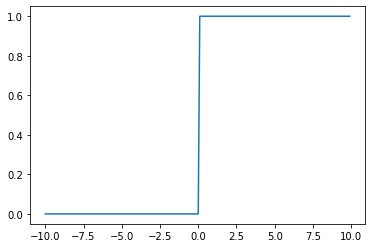

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def setpfunc(x):
  return np.where(x <= 0, 0 ,1)

x = np.arange(-10, 10, 0.1)
y = setpfunc(x)

plt.plot(x, y)


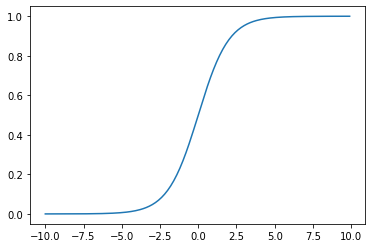

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)

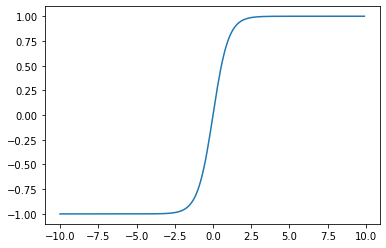

In [ ]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = tanh(x)

plt.plot(x, y)

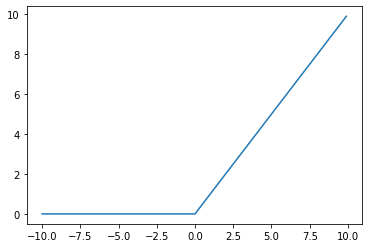

In [ ]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x, y)

소프트맥스 함수

입력받은 값들을 0~1 사이 값으로 정규화 한다. 총합은 항상 1

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

softmax([1, 1, 2])

array([0.21194156, 0.21194156, 0.57611688])

다층 퍼셉트론

입력 > 은닉 > 출력

In [ ]:
X = np.array([10, 20])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([1,2,3])

# def sigmoid(x):
#   return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1   # array([ 6., 13., 20.])
Z1 = sigmoid(A1)          # array([0.99752738, 0.99999774, 1.        ])

In [ ]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2  # array([0.69975229, 1.69900982])
Y = sigmoid(A2)           # array([0.66813285, 0.84540537])

In [ ]:
Y

array([0.66813285, 0.84540537])

# 텐서플로 기초

In [8]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow 2.0!')
hello

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, TensorFlow 2.0!'>

선형 회귀 문제

In [4]:
x_data = [1,2,3,4,5]
y_data = [2,3,4,5,6]

w = tf.Variable(0.7)  # 초기값과 w값의 차이가 작을 수록 학습에 걸리는 시간도 줄어든다.
b = tf.Variable(0.7)  # 초기값과 b값의 차이가 작을 수록 학습에 걸리는 시간도 줄어든다.
learn_rate = 0.01     
# 학습률은 보통 0.1 ~ 0.001 사이에 값으로 설정한다. 학습률이 너무 크면 '비용'이 무한대로 늘어나 학습이 제대로 이루어지지 않는다.
# 또한 학습률이 너무 작으면 학습에 걸리는 시간이 오래 걸리므로 적절한 학습률을 정하는 것이 중요하다.


step|    w|    b| cost
----|-----|-----|-----
   1| 0.85| 0.74| 0.95


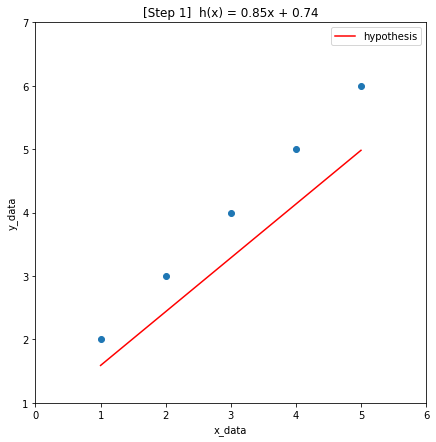

   3| 0.93| 0.77| 0.33


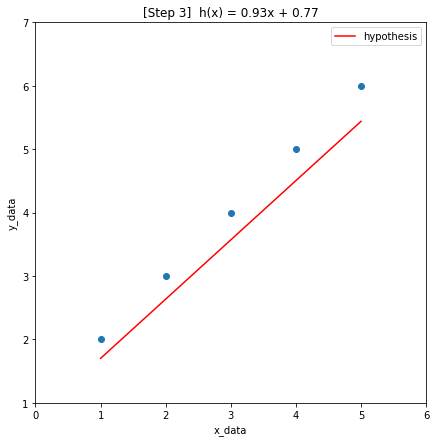

   5| 0.98| 0.78| 0.12


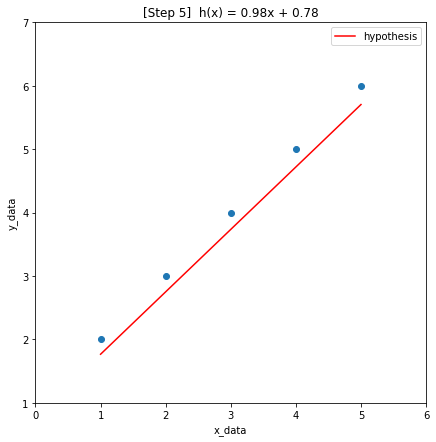

  10| 1.04| 0.80| 0.01


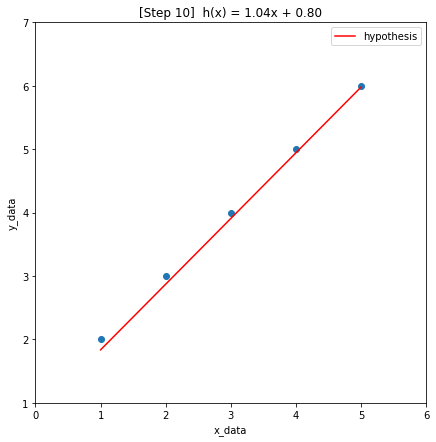

1000| 1.00| 0.99| 0.00


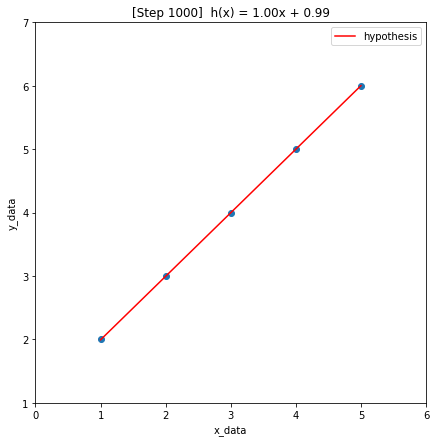

1100| 1.00| 1.00| 0.00


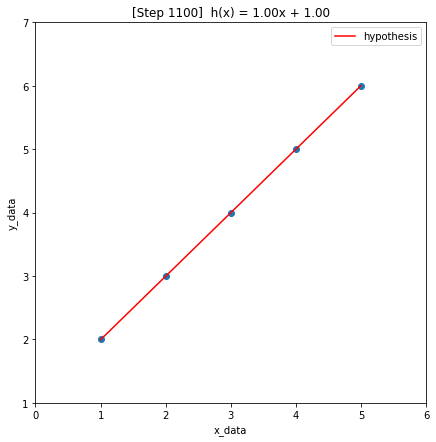

In [9]:
print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b])
    w.assign_sub(learn_rate * dw) # a = a - b
    b.assign_sub(learn_rate * db) 
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') # ⑥
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') # ⑦
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

# 실제로 적용해보기


In [ ]:
pip install keras

In [ ]:
pip install ccxt

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ccxt

In [ ]:
binance = ccxt.binance()
btc_ohlcv = binance.fetch_ohlcv('BTC/USDT', '1d')  # fetch는 500개만
raw_df = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
raw_df['datetime'] = pd.to_datetime(raw_df['datetime'], unit='ms')
raw_df.set_index('datetime', inplace=True)
raw_df

In [27]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2021-03-02 to 2022-07-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    500 non-null    float64
 1   high    500 non-null    float64
 2   low     500 non-null    float64
 3   volume  500 non-null    float64
 4   close   500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [26]:
data_x = []
data_y = []

window_size = 10 
data_size = 5

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.007106163872193884, 0.017899723030912543, 0.029491732578272038, 0.1523682840773681, 0.026071855774341676], [0.026071861143889537, 0.025894254310390896, 0.03461699903697377, 0.20717954175092537, 0.024818020951018042], [0.024818232014222157, 0.024384541819976038, 0.04401712743095938, 0.17205845930881025, 0.03282295720478688], [0.032822963964736815, 0.04786160067065339, 0.05410819664024555, 0.1787074666579959, 0.0546635323540982], [0.05466374956404175, 0.061777079786302834, 0.07339980740884147, 0.9999999999997418, 0.054040939931150195], [0.05404095106098369, 0.050726380055380244, 0.07613352976503045, 0.41988748196110837, 0.05398080199284364], [0.053987403570641426, 0.043209110119488574, 0.062406893770293244, 0.45544446558207596, 0.038959498334181254], [0.03893149690147666, 0.028286213869957014, 0.04636237561821227, 0.31432342917654654, 0.02044731092792746], [0.020447315139089706, 0.011952327971387003, 0.03329190706242482, 0.3194129537975962, 0.007372252190488606], [0.00742435953595859

In [28]:
# 훈련용
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

# 테스트용 
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [29]:
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            640       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
12/12 [==============================] - 3s

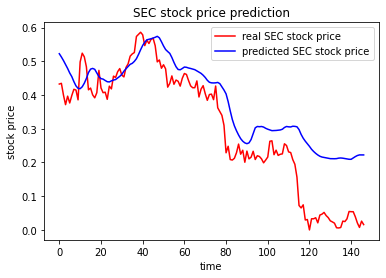

In [30]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [31]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')

Tomorrow's SEC price : [278058.56] KRW
